<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>SUPERSTORE SALES PREDICTION
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [17]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset of Superstore</strong></h1>
</div>


In [3]:
file_path = (r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\04-Superstore Sales Dataset .csv")
df =pd.read_csv(file_path)

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [9]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 9800 and Number of Columns: 18


In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [8]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2520,2521,CA-2017-124352,15/10/2017,21/10/2017,Standard Class,CD-12790,Cynthia Delaney,Home Office,United States,Oklahoma City,Oklahoma,73120.0,Central,OFF-AP-10002651,Office Supplies,Appliances,Hoover Upright Vacuum With Dirt Cup,868.590
5298,5299,CA-2017-106656,23/09/2017,26/09/2017,First Class,DV-13045,Darrin Van Huff,Corporate,United States,San Diego,California,92037.0,West,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,4.080
1407,1408,CA-2017-130407,02/09/2017,06/09/2017,Standard Class,KD-16270,Karen Daniels,Consumer,United States,New York City,New York,10024.0,East,OFF-AR-10002240,Office Supplies,Art,Panasonic KP-150 Electric Pencil Sharpener,75.480
2008,2009,CA-2015-116407,15/11/2015,21/11/2015,Standard Class,JF-15190,Jamie Frazer,Consumer,United States,Johnson City,Tennessee,37604.0,South,OFF-AR-10001315,Office Supplies,Art,Newell 310,4.224
4398,4399,US-2015-138758,07/07/2015,11/07/2015,Standard Class,JL-15835,John Lee,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,FUR-FU-10003039,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Grantwood Wall ...",69.008


In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [11]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Preprocessing the Dat</strong></h1>
</div>



In [13]:
# Converting 'Order Date' and 'Ship Date' columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Extracting year and month for further time series analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Dropping rows with missing Postal Code values
data = df.dropna(subset=['Postal Code'])

# Removing irrelevant columns for prediction
data_clean = data[['Order Date', 'Sales']].set_index('Order Date')

# Checking for missing values
data_clean.isnull().sum()


Sales    0
dtype: int64

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>


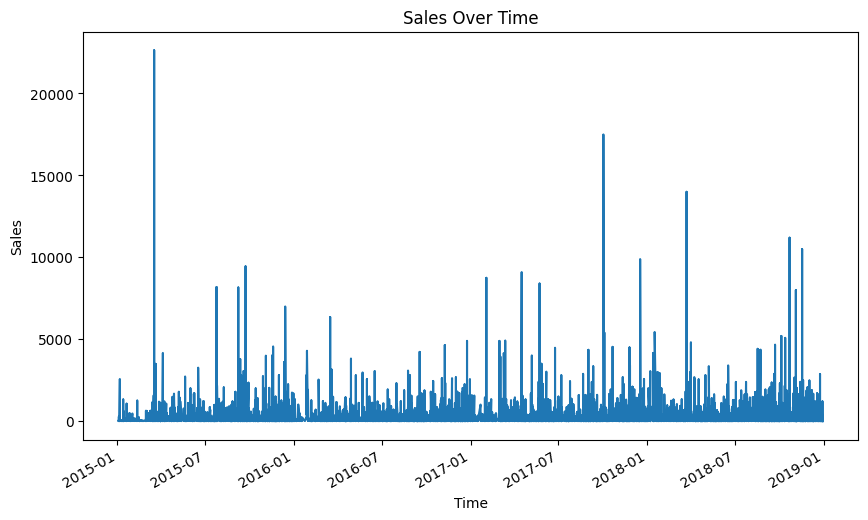

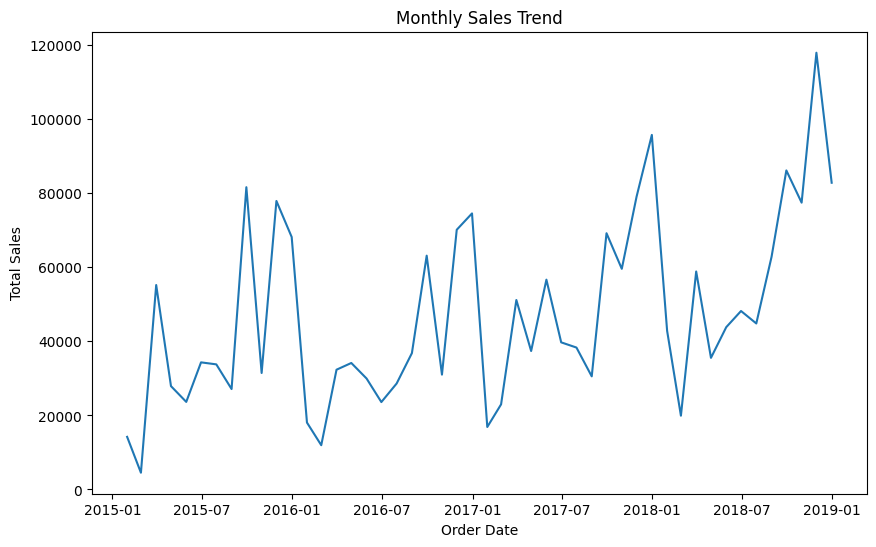

In [14]:
# Visualizing sales over time
plt.figure(figsize=(10,6))
data_clean['Sales'].plot()
plt.title('Sales Over Time')
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()

# Monthly Sales Distribution
monthly_sales = data_clean.resample('M').sum()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y='Sales')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Sales Distribution</strong></h1>
</div>


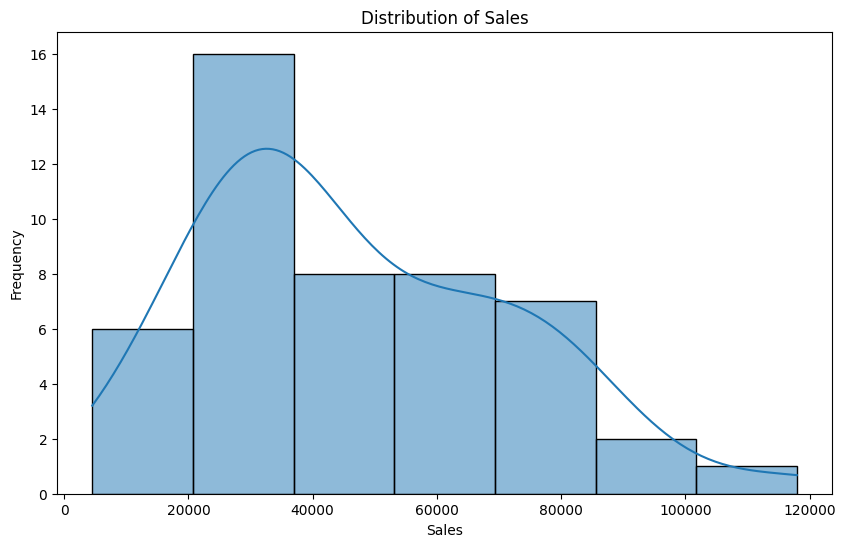

In [20]:
# Distribution of sales values
plt.figure(figsize=(10,6))
sns.histplot(monthly_sales['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Sales Seasonality Plot</strong></h1>
</div>


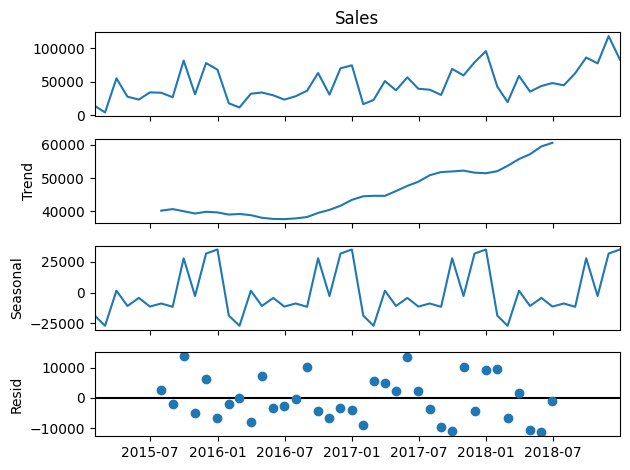

In [21]:
# Seasonal decomposition of time series data
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the sales time series
decomposition = seasonal_decompose(monthly_sales['Sales'], model='additive')
decomposition.plot()
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Residuals Plot</strong></h1>
</div>


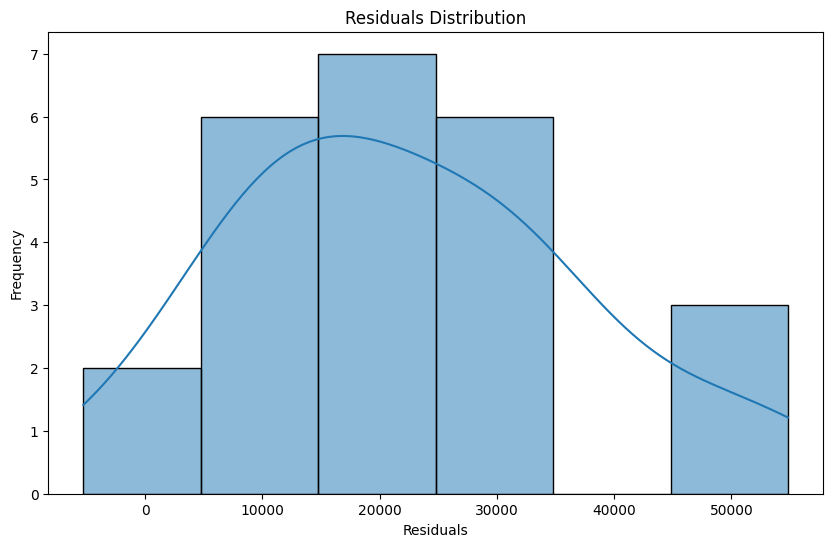

In [22]:
# Residual plot to check errors
residuals = test['Sales'] - predictions
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Actual vs Predicted Sales Scatter Plot</strong></h1>
</div>


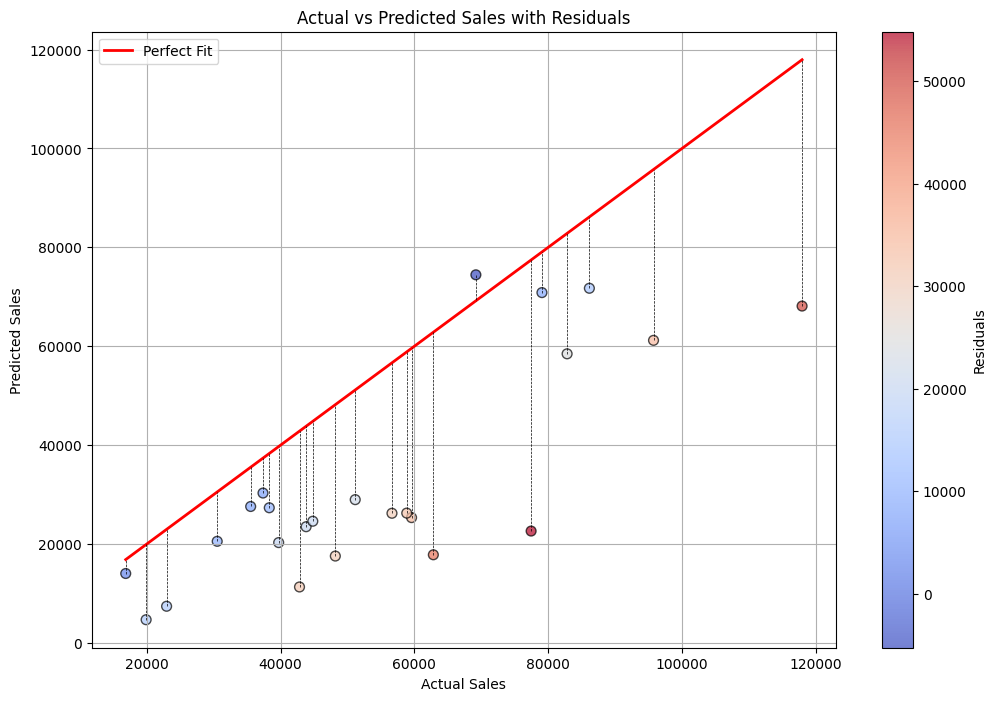

In [24]:
# Calculate residuals
residuals = test['Sales'] - predictions

# Scatter plot of actual vs predicted sales with residuals highlighted
plt.figure(figsize=(12,8))

# Scatter plot
plt.scatter(test['Sales'], predictions, c=residuals, cmap='coolwarm', s=50, alpha=0.7, edgecolors='k')

# Add color bar
plt.colorbar(label='Residuals')

# Plot the line y=x
plt.plot([test['Sales'].min(), test['Sales'].max()], 
         [test['Sales'].min(), test['Sales'].max()], 
         'r', lw=2, label='Perfect Fit')

# Plot residual lines
for i in range(len(test)):
    plt.plot([test['Sales'].iloc[i], test['Sales'].iloc[i]], 
             [predictions[i], test['Sales'].iloc[i]], 
             'k--', lw=0.5)

# Titles and labels
plt.title('Actual vs Predicted Sales with Residuals')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.grid(True)

plt.show()

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Train-Test Split </strong></h1>
</div>


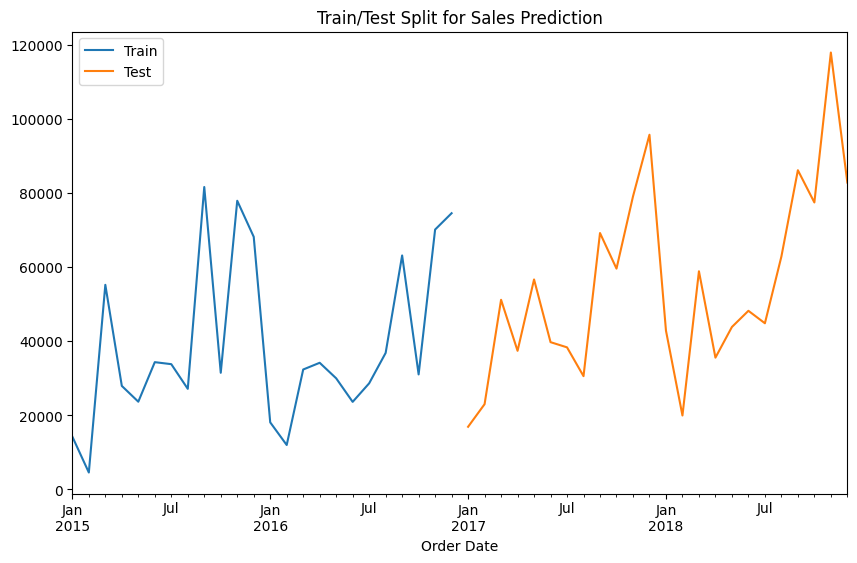

In [15]:
# Splitting the data into training and testing sets (80/20 split)
train = monthly_sales[:'2016']
test = monthly_sales['2017':]

# Visualizing train-test split
plt.figure(figsize=(10,6))
train['Sales'].plot(label='Train', title='Train/Test Split for Sales Prediction')
test['Sales'].plot(label='Test')
plt.legend()
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Time Series Forecasting Model (Exponential Smoothing)</strong></h1>
</div>


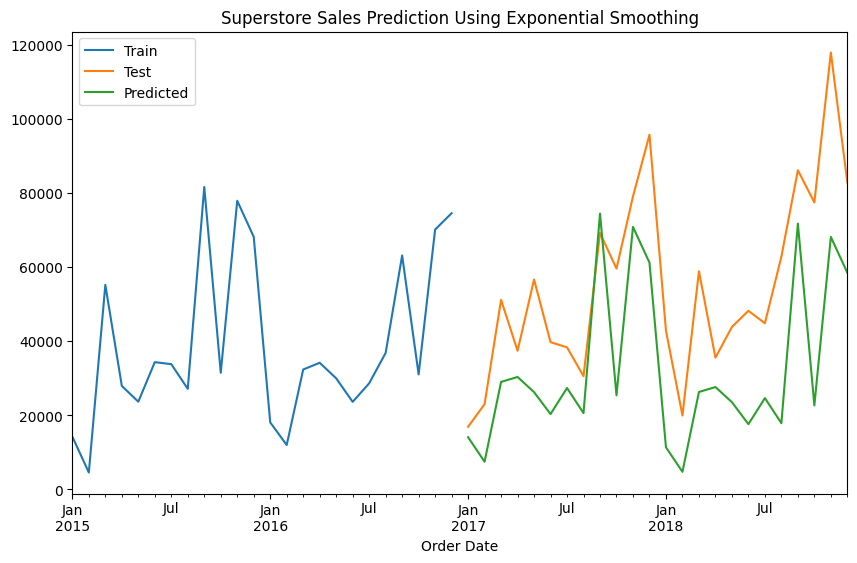

In [18]:
# Applying Exponential Smoothing model for time series forecasting
model = ExponentialSmoothing(train['Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Forecasting the sales for the test period
predictions = fit_model.forecast(len(test))

# Plotting the forecast
plt.figure(figsize=(10,6))
train['Sales'].plot(label='Train')
test['Sales'].plot(label='Test')
predictions.plot(label='Predicted')
plt.title('Superstore Sales Prediction Using Exponential Smoothing')
plt.legend()
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Model Evaluation</strong></h1>
</div>



In [19]:
# Calculating the error metrics
mse = mean_squared_error(test['Sales'], predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test['Sales'], predictions)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared Score: {r2}')


Root Mean Squared Error (RMSE): 26765.677867754108
R-squared Score: -0.1699568157646032


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Time Series Forecasting Model (ARIMA Model)</strong></h1>
</div>


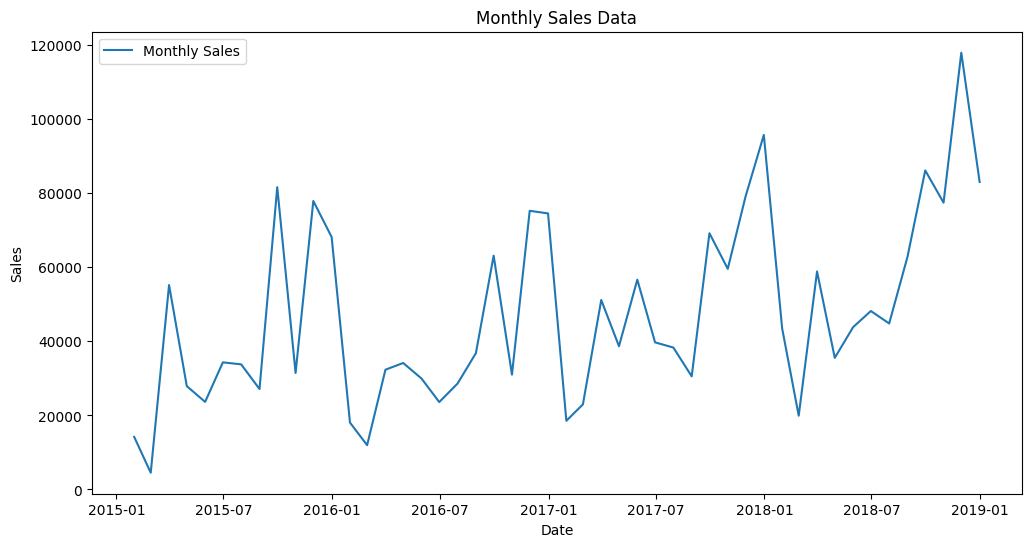

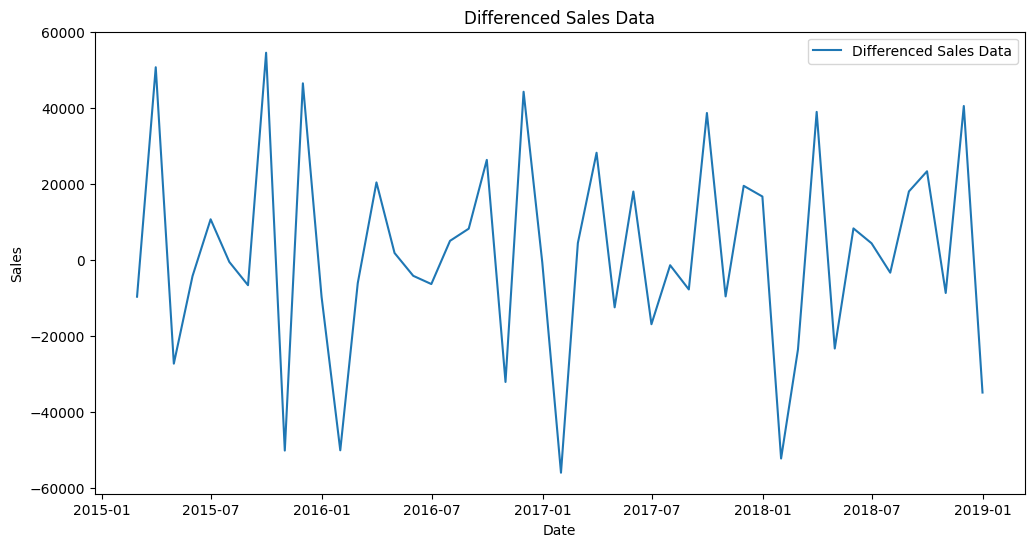

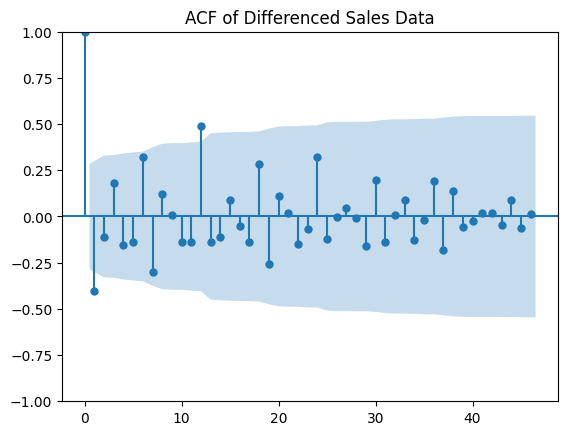

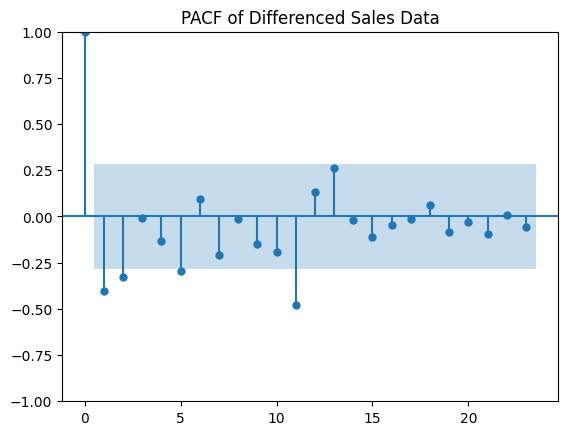

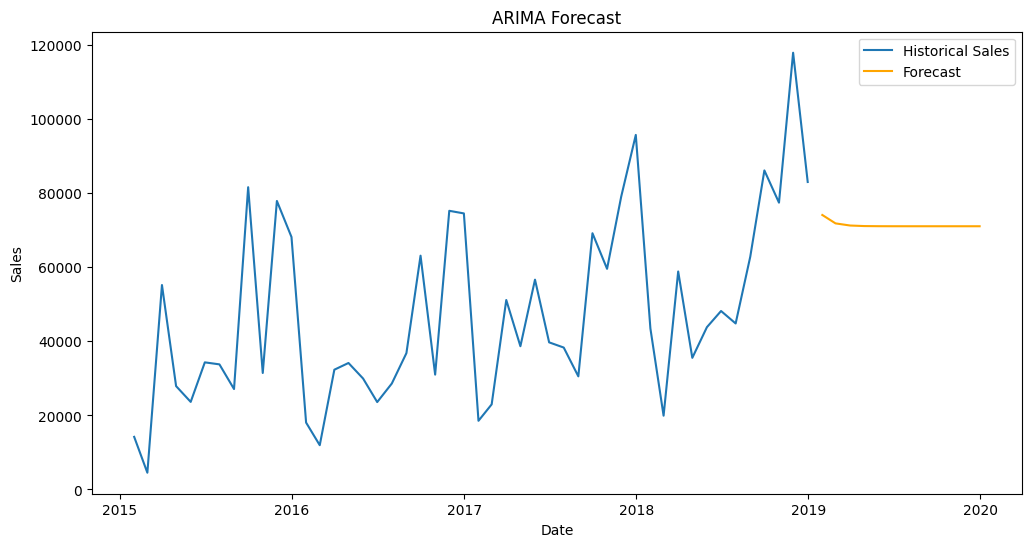

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -539.293
Date:                Thu, 19 Sep 2024   AIC                           1084.585
Time:                        00:13:19   BIC                           1090.136
Sample:                    01-31-2015   HQIC                          1086.674
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2546      0.265      0.961      0.337      -0.265       0.774
ma.L1         -0.8477      0.144     -5.898      0.000      -1.129      -0.566
sigma2      5.791e+08   8.52e-11   6.79e+18      0.0

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_path = r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\04-Superstore Sales Dataset .csv"
df = pd.read_csv(file_path)

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Order Date'], inplace=True)

# Set 'Order Date' as index
df.set_index('Order Date', inplace=True)
df.sort_index(inplace=True)

# Convert 'Sales' to numeric type if it's not already
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Resample data by month and sum the sales
df_monthly = df['Sales'].resample('M').sum()  # Only resample the Sales column

# Plot the sales data
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Monthly Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Check stationarity and perform differencing if necessary
df_monthly_diff = df_monthly.diff().dropna()
plt.figure(figsize=(12,6))
plt.plot(df_monthly_diff, label='Differenced Sales Data')
plt.title('Differenced Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Adjust number of lags for ACF and PACF
num_lags = min(len(df_monthly_diff) - 1, 50)

# Limit PACF lags to be less than 50% of the sample size
pacf_lags = min(num_lags, len(df_monthly_diff) // 2)

# ACF and PACF plots to determine parameters
plot_acf(df_monthly_diff, lags=num_lags)
plt.title('ACF of Differenced Sales Data')
plt.show()

plot_pacf(df_monthly_diff, lags=pacf_lags)
plt.title('PACF of Differenced Sales Data')
plt.show()

# Fit ARIMA model
model = ARIMA(df_monthly, order=(1,1,1))  # Adjust parameters (p,d,q) as needed
model_fit = model.fit()  # Remove disp=0

# Make predictions
forecast = model_fit.forecast(steps=12)  # Forecasting next 12 months

# Forecast is a pandas Series; use it directly
plt.figure(figsize=(12,6))
plt.plot(df_monthly, label='Historical Sales')
plt.plot(forecast.index, forecast.values, label='Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Print model summary
print(model_fit.summary())

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Conclusion</strong></h1>
</div>


<div >
    <h1 style="font-size: 16px;"><strong>
In this notebook, we analyzed the monthly sales data using two different models: ARIMA and SARIMAX. Here's a concise summary of the findings:

ARIMA Model Results:

Root Mean Squared Error (RMSE): 26,765.68
R-squared Score: -0.17
The ARIMA model provided a forecast for the next 12 months, but the negative R-squared score suggests that the model's fit is poor, and its predictive power is limited. This could be due to the complexity of the sales data or model parameters.

SARIMAX Model Results:

Log Likelihood: -539.293
AIC: 1084.585
BIC: 1090.136
AR Coefficient (L1): 0.2546
MA Coefficient (L1): -0.8477
Sigma2 (Variance): 5.79e+08
Ljung-Box (L1) (Q): 0.30, p-value: 0.58
Jarque-Bera (JB): 1.12, p-value: 0.57
The SARIMAX model provided detailed insights into the seasonal and trend components of the data. However, the warning regarding the singular covariance matrix and the high condition number indicate potential issues with model stability and the reliability of standard errors.

Conclusion: Both models provided insights into the sales data, but the ARIMA model's performance was suboptimal, while the SARIMAX model highlighted some stability concerns. Further model refinement and feature engineering may be needed to improve the forecasting accuracy and reliability. Future work could include exploring alternative models or adjusting the current models' parameters to better capture the underlying patterns in the sales data.
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->